#### Garment sorting

### Imports + Data Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Visualize a Few Images

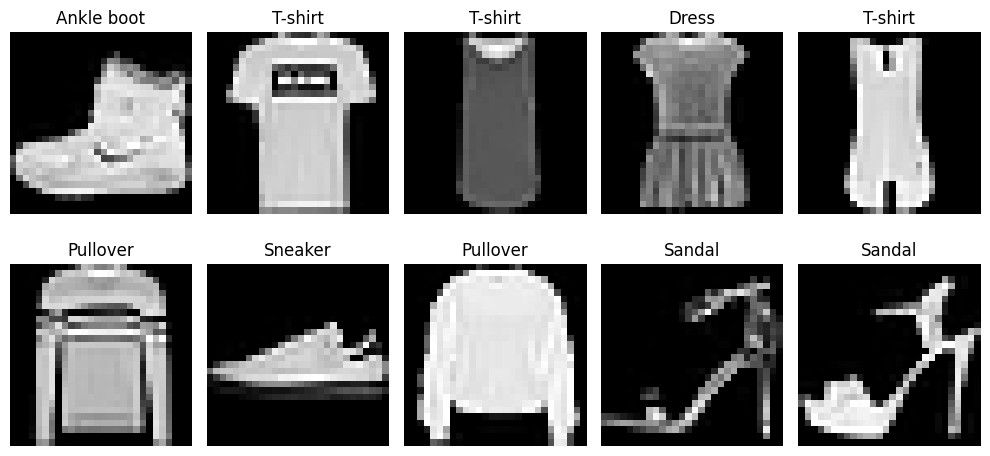

In [2]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

### Define Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='linear')
])
# Important: Tell loss function you're giving raw logits
loss_fn = CategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

C:\Users\anshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7762 - loss: 0.6403
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8599 - loss: 0.3808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8745 - loss: 0.3408
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8868 - loss: 0.3061
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8915 - loss: 0.2909
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8996 - loss: 0.2722
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9010 - loss: 0.2664
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9066 - loss: 0.2460
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9096 - loss: 0.2398
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9122 - loss: 0.2334


### Evaluate Model on Test Data

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8892 - loss: 0.3298
Test Accuracy: 0.8860999941825867


### Make Predictions 

In [5]:
import tensorflow as tf

# Raw logits from model
logits = model.predict(X_test)

# Convert logits to probabilities
probs = tf.nn.softmax(logits).numpy()

# Example: Show first 5 predicted class indices
import numpy as np
print("Predicted classes:", np.argmax(probs[:5], axis=1))
print("Actual classes   :", np.argmax(y_test[:5], axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted classes: [9 2 1 1 6]
Actual classes   : [9 2 1 1 6]


### Visualize Predictions

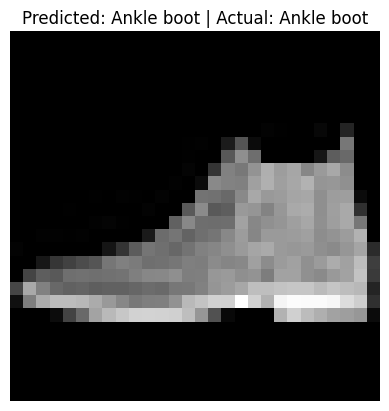

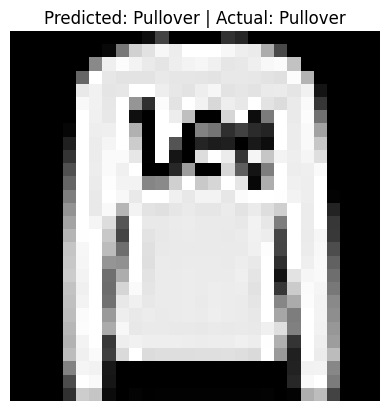

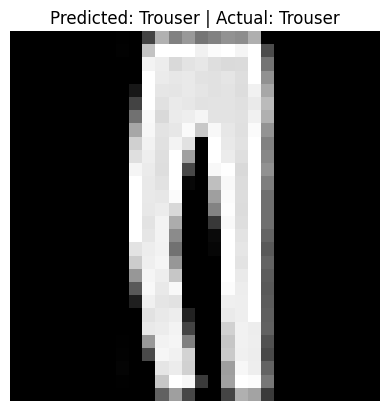

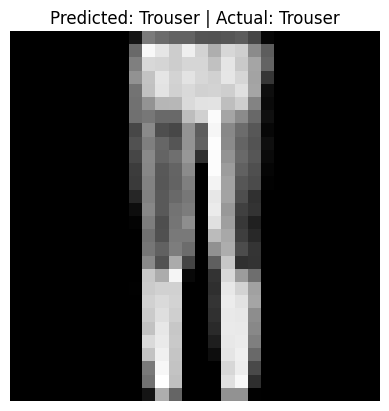

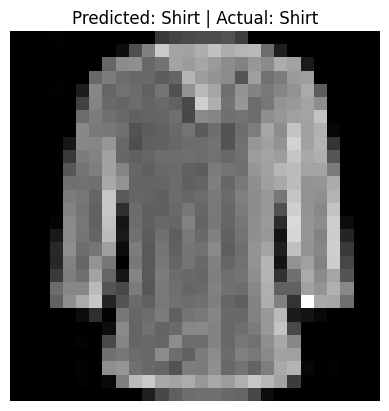

In [6]:
import matplotlib.pyplot as plt

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(5):
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Predicted: {class_names[np.argmax(probs[i])]} | Actual: {class_names[np.argmax(y_test[i])]}")
    plt.axis("off")
    plt.show()

### Training vs Validation Loss and Accuracy

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9141 - loss: 0.2267 - val_accuracy: 0.9105 - val_loss: 0.2324
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9173 - loss: 0.2173 - val_accuracy: 0.9090 - val_loss: 0.2442
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9202 - loss: 0.2090 - val_accuracy: 0.9078 - val_loss: 0.2471
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9251 - loss: 0.1970 - val_accuracy: 0.9092 - val_loss: 0.2433
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9273 - loss: 0.1960 - val_accuracy: 0.9048 - val_loss: 0.2667
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9249 - loss: 0.1941 - val_accuracy: 0.9023 - val_loss: 0.2643
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9296 - loss: 0.1863 - val_accuracy: 0.9098 - val_loss: 0.2483
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9327 - loss: 0.1784 - 

###  Plot the Graphs

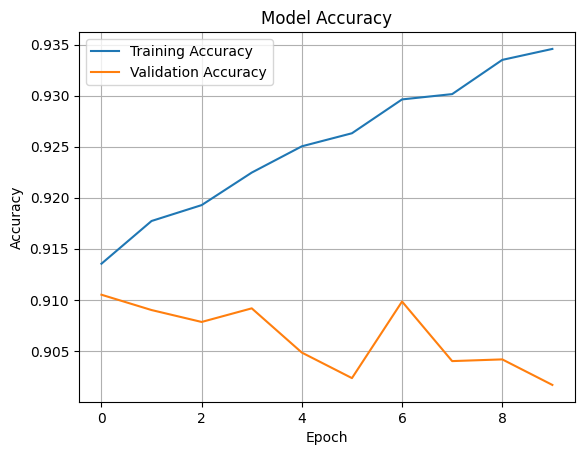

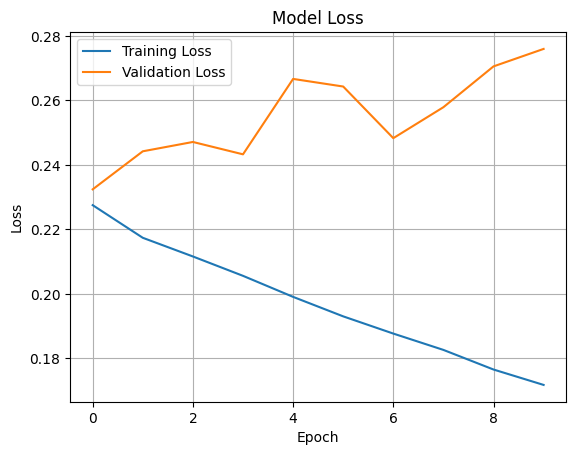

In [8]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Updated Model with Dropout

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout after first hidden layer
    Dense(64, activation='relu'),
    Dropout(0.3),  # Dropout after second hidden layer
    Dense(10, activation='linear')  # or 'softmax' if not using from_logits=True
])

In [10]:
import tensorflow as tf

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6926 - loss: 0.8691 - val_accuracy: 0.8432 - val_loss: 0.4167
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8305 - loss: 0.4761 - val_accuracy: 0.8597 - val_loss: 0.3878
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8436 - loss: 0.4377 - val_accuracy: 0.8630 - val_loss: 0.3717
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8501 - loss: 0.4174 - val_accuracy: 0.8688 - val_loss: 0.3651
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8537 - loss: 0.4004 - val_accuracy: 0.8750 - val_loss: 0.3528
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8598 - loss: 0.3849 - val_accuracy: 0.8673 - val_loss: 0.3626
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8659 - loss: 0.3697 - val_accuracy: 0.8767 - val_loss: 0.3454
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8672 - loss: 0.3673 -

### Plot: Accuracy and Loss (With Dropout)

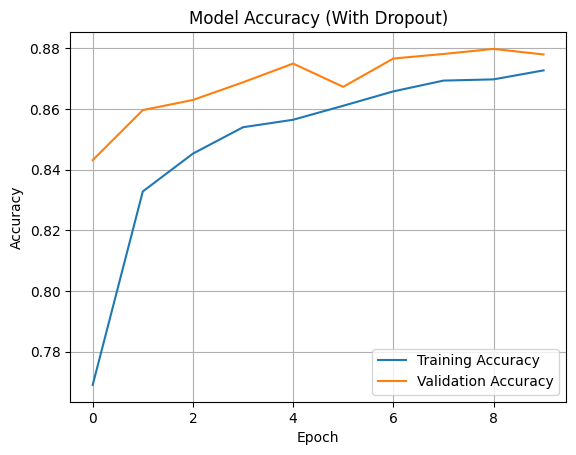

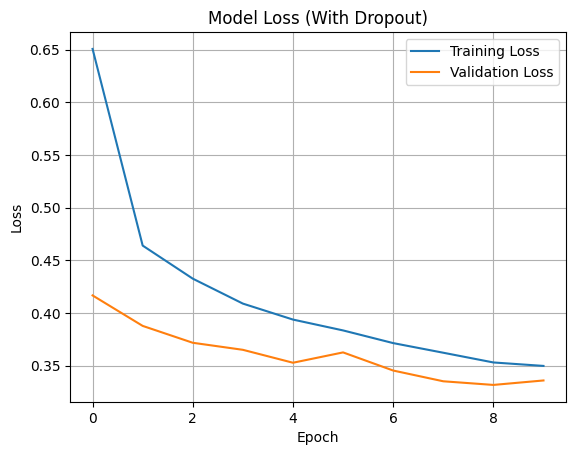

In [11]:
# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
